In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn (6).csv


In [ ]:
data = pd.read_csv("churn.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.rename(columns={'HasCrCard': 'Credit Card Status', 'IsActiveMember': 'Activity', 'Exited': 'Status'}, inplace=True)
data.Status = data.Status.map({0: 'Retained', 1: 'Exited'})
data['Credit Card Status'] = data['Credit Card Status'].map({0: 'No Credit Card', 1: 'Has Credit Card'})
data.Activity = data.Activity.map({0: 'Inactive', 1: 'Active'})
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Credit Card Status,Activity,EstimatedSalary,Status
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Has Credit Card,Active,101348.88,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No Credit Card,Active,112542.58,Retained
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Has Credit Card,Inactive,113931.57,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No Credit Card,Inactive,93826.63,Retained
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Has Credit Card,Active,79084.10,Retained


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'Credit Card Status', 'Activity', 'EstimatedSalary', 'Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  Credit Card Status  10000 non-null  object 
 11  Activity            10000 non-null  object 
 12  EstimatedSalary     10000 non-null  float64
 13  Status              10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
Credit Card Status    0
Activity              0
EstimatedSalary       0
Status                0
dtype: int64

In [ ]:
data.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
Credit Card Status        2
Activity                  2
EstimatedSalary        9999
Status                    2
dtype: int64

In [ ]:
data_new = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Credit Card Status,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1,Has Credit Card,Active,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No Credit Card,Active,112542.58,Retained
2,502,France,Female,42,8,159660.80,3,Has Credit Card,Inactive,113931.57,Exited
3,699,France,Female,39,1,0.00,2,No Credit Card,Inactive,93826.63,Retained
4,850,Spain,Female,43,2,125510.82,1,Has Credit Card,Active,79084.10,Retained


In [ ]:
num = []
cat = []
for columns in data_new:
  if ( data_new.dtypes[columns] == 'int64') or (data_new.dtypes[columns] == 'float64' ):
    num.append(columns)
  else:
    cat.append(columns)
num,cat

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'EstimatedSalary'],
 ['Geography', 'Gender', 'Credit Card Status', 'Activity', 'Status'])

In [ ]:
num = np.array(num)
type(num)
cat = np.array(cat)

In [ ]:
for i in num:
  plt.figure(figsize=(15,6))
  px.box(data_new, x = num[i])
  plt.show()
for i in cat:
  plt.figure(figsize=(15,6))
  px.histogram(data_new, x = cat[i] )
  plt.show()

IndexError: ignored

<Figure size 1080x432 with 0 Axes>

In [ ]:
data_new['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data_new['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
fig1 = px.histogram(data_new, x = 'Geography', color = 'Geography')
fig1.show()

In [ ]:
data_new['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data_new['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
fig2 = px.pie(data_new, names = 'Gender')
fig2.show()

In [ ]:
data_new['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [ ]:
data_new['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
fig3 = px.histogram(data_new, x = 'NumOfProducts', color = 'NumOfProducts')
fig3.show()

In [ ]:
data_new['Credit Card Status'].unique()

array(['Has Credit Card', 'No Credit Card'], dtype=object)

In [ ]:
data_new['Credit Card Status'].value_counts()

Has Credit Card    7055
No Credit Card     2945
Name: Credit Card Status, dtype: int64

In [ ]:
fig4 = px.histogram(data_new, x = 'Credit Card Status', color = 'Credit Card Status')
fig4.show()

In [ ]:
data_new['Activity'].unique()

array(['Active', 'Inactive'], dtype=object)

In [ ]:
data_new['Activity'].value_counts()

Active      5151
Inactive    4849
Name: Activity, dtype: int64

In [ ]:
fig5 = px.histogram(data_new, x = 'Activity', color = 'Activity')
fig5.show()

In [ ]:
data_new['Status'].unique()

array(['Exited', 'Retained'], dtype=object)

In [ ]:
data_new['Status'].value_counts()

Retained    7963
Exited      2037
Name: Status, dtype: int64

In [ ]:
fig6 = px.histogram(data_new, x = 'Status', color = 'Status')
fig6.show()

In [ ]:
values = data_new['Status'].value_counts()
names = ['Retained', 'Exited']
fig7 = px.pie(values = values, names = names)
fig7.show()

In [ ]:
data_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'Credit Card Status', 'Activity', 'EstimatedSalary',
       'Status'],
      dtype='object')

In [ ]:
data_new_numeric = data_new[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'Credit Card Status', 'Activity', 'EstimatedSalary','Status']]

In [ ]:
data_exited = data_new.drop(columns = 'Status')

In [ ]:
data_exited.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'Credit Card Status', 'Activity', 'EstimatedSalary'],
      dtype='object')

In [ ]:
data_exited.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Credit Card Status,Activity,EstimatedSalary
0,619,France,Female,42,2,0.00,1,Has Credit Card,Active,101348.88
1,608,Spain,Female,41,1,83807.86,1,No Credit Card,Active,112542.58
2,502,France,Female,42,8,159660.80,3,Has Credit Card,Inactive,113931.57
3,699,France,Female,39,1,0.00,2,No Credit Card,Inactive,93826.63
4,850,Spain,Female,43,2,125510.82,1,Has Credit Card,Active,79084.10


In [ ]:
data_new_numeric.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


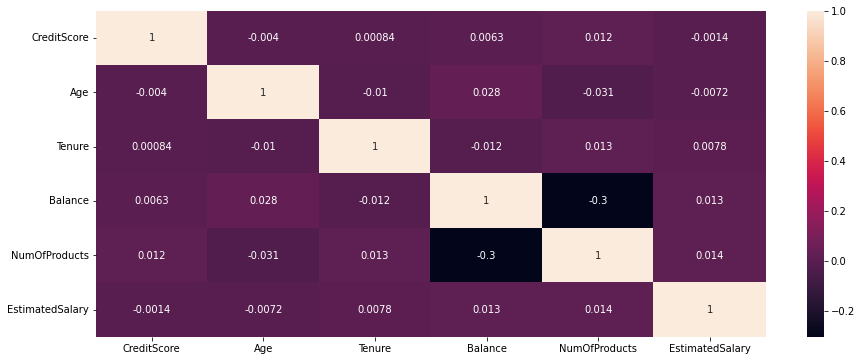

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data_new_numeric.corr(), annot = True)
plt.show()

In [ ]:
px.histogram(data_new, x='Age', color='Status')

In [ ]:
px.histogram(data_new, x='CreditScore', color='Status')


In [ ]:
px.box(data_new, x='Tenure', color='Status')

In [ ]:
px.histogram(data_new, x='EstimatedSalary', color='Status')

In [ ]:
fig = px.sunburst(data_new, path=['Credit Card Status', 'Status'])
fig.update_traces(textinfo='label + percent parent')

In [ ]:
fig = px.sunburst(data_new, path=['Activity', 'Status'])
fig.update_traces(textinfo='label + percent parent')

In [ ]:
fig = px.sunburst(data_new, path=['NumOfProducts', 'Status'])
fig.update_traces(textinfo='label + percent parent')

In [ ]:
# Logistic Regression To be Continued....

Decision Tree Model

In [ ]:
X = data_new.drop('Status',axis=1)
X = pd.get_dummies(X)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Credit Card Status_Has Credit Card,Credit Card Status_No Credit Card,Activity_Active,Activity_Inactive
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,1,0,1,0
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,1,0,0,1
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,0,1,0,1
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,1,0,0,0,1,1,0,0,1
9996,516,35,10,57369.61,1,101699.77,1,0,0,0,1,1,0,1,0
9997,709,36,7,0.00,1,42085.58,1,0,0,1,0,0,1,1,0
9998,772,42,3,75075.31,2,92888.52,0,1,0,0,1,1,0,0,1


In [ ]:
y = data_new.Status
y

0         Exited
1       Retained
2         Exited
3       Retained
4       Retained
          ...   
9995    Retained
9996    Retained
9997      Exited
9998      Exited
9999    Retained
Name: Status, Length: 10000, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,random_state = 42)

In [ ]:
X_train.shape

(6000, 15)

In [ ]:
y_train.shape

(6000,)

In [ ]:
depth = np.arange(1,15)
mae = []
auroc = []
for k in depth:
    dt_class = DecisionTreeClassifier(max_depth=k, min_samples_leaf=5)
    dt_class.fit(X_train, y_train)
    y_pred = dt_class.predict_proba(X_valid)
    auroc.append(roc_auc_score(y_valid,y_pred[:,1]))

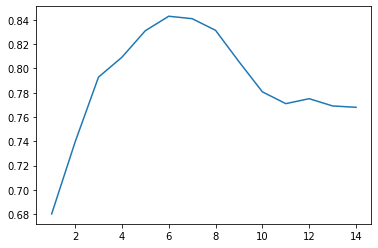

In [ ]:
plt.plot(depth,np.array(auroc))

In [ ]:
# Initialize model with parameters
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
# Fit model to training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

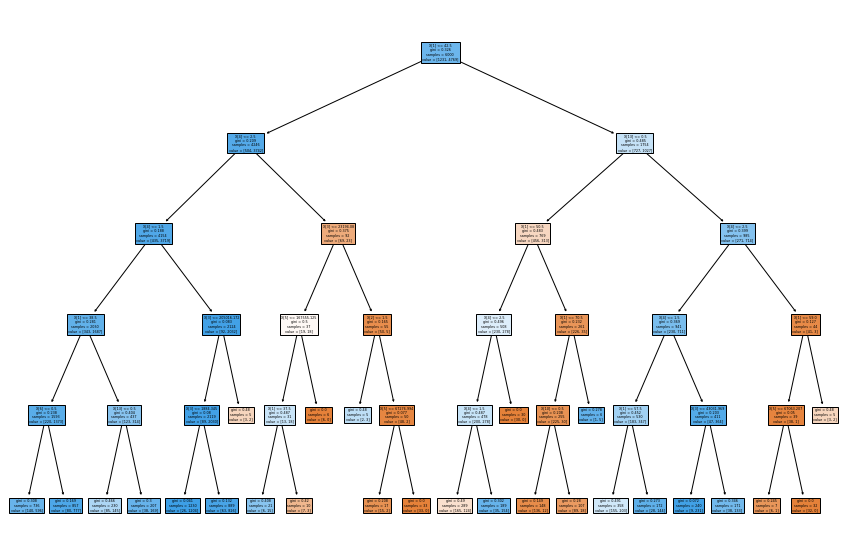

In [ ]:
# Plot tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True)
plt.show()

In [ ]:
# Use trained model to make predictions on test data
y_pred = dt_model.predict(X_test)

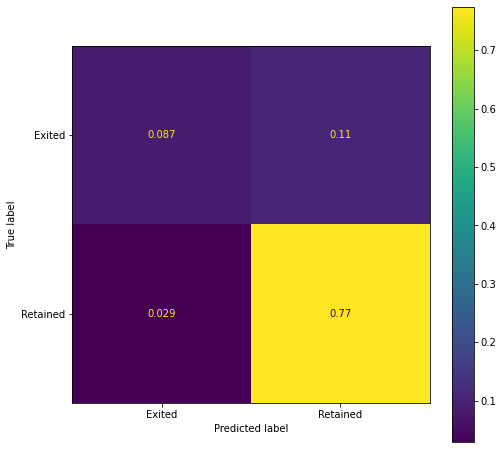

In [ ]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all', ax=ax)
plt.show()

Text(0.5, 0.98, 'ROC Curve for DT Model')

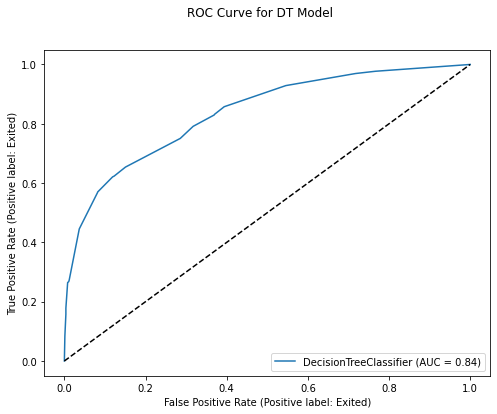

In [ ]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, pos_label='Exited', ax=ax)
ax.plot([0, 1], [0, 1], 'k--' )
fig.suptitle('ROC Curve for DT Model')

In [ ]:
# Calculate area under roc curve
y_pred_prob = dt_model.predict_proba(X_test) 
roc_auc_score(y_test, y_pred_prob[:, 1])

0.8356696450484602